In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py

In [2]:
gdp_file = 'API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv'
gdp_df = pd.read_csv(gdp_file, sep=",", encoding='cp1252')
gdp_df.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1959,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
countries= gdp_df['Country Name']
countries= pd.DataFrame(countries)
gdp_2015 = gdp_df['2015']
gdp_2015 = pd.DataFrame(gdp_2015)
gdp_2015 = round(gdp_2015/1000000000,2)
gdp_2016 = gdp_df['2016']
gdp_2016 = pd.DataFrame(gdp_2016)
gdp_2016 = round(gdp_2016/1000000000,2)
gdp = countries.join(gdp_2015)
gdp = gdp.join(gdp_2016)
gdp = gdp.dropna(how='all')

In [4]:
gdp['2015'] = gdp['2015'].astype('float')
gdp['2016'] = gdp['2016'].astype('float')
gdp = gdp.rename(columns = {"2015": "GDP, 2015 (billions)", "2016":"GDP, 2016 (billions)"})
gdp.head(1)

,Country Name,"GDP, 2015 (billions)","GDP, 2016 (billions)"
0,Aruba,NaN,NaN


In [5]:
happiness_2015 = 'happiness_2015.csv'
happiness_2015 = pd.read_csv(happiness_2015, sep=",", encoding='cp1252')
happiness_2016 = 'happiness_2016.csv'
happiness_2016 = pd.read_csv(happiness_2016, sep=",", encoding='cp1252')

In [6]:
happiness_country = happiness_2015['Country']
happiness_country = pd.DataFrame(happiness_country)
happiness_rank = happiness_2015['Happiness Rank']
happiness_rank = pd.DataFrame(happiness_rank)
happiness_score = happiness_2015['Happiness Score']
happiness_score = pd.DataFrame(happiness_score)
happiness_2015 = happiness_country.join(happiness_rank)
happiness_2015 = happiness_2015.join(happiness_score)
happiness_2015 = happiness_2015.rename(columns={'Country':'Country Name'})
happiness_country = happiness_2016['Country']
happiness_country = pd.DataFrame(happiness_country)
happiness_rank = happiness_2016['Happiness Rank']
happiness_rank = pd.DataFrame(happiness_rank)
happiness_score = happiness_2016['Happiness Score']
happiness_score = pd.DataFrame(happiness_score)
happiness_2016 = happiness_country.join(happiness_rank)
happiness_2016 = happiness_2016.join(happiness_score)
happiness_2016 = happiness_2016.rename(columns={'Country':'Country Name'})
happiness = pd.DataFrame.merge(happiness_2015, happiness_2016, on='Country Name')
happiness.head(1)

,Country Name,Happiness Rank_x,Happiness Score_x,Happiness Rank_y,Happiness Score_y
0,Switzerland,1,7.587,2,7.509


In [7]:
happiness = pd.DataFrame.merge(happiness,gdp)
happiness.head(1)

,Country Name,Happiness Rank_x,Happiness Score_x,Happiness Rank_y,Happiness Score_y,"GDP, 2015 (billions)","GDP, 2016 (billions)"
0,Switzerland,1,7.587,2,7.509,679.0,669.0


In [8]:
population_file = 'API_SP.POP.TOTL_DS2_en_csv_v2.csv'
population_file = pd.read_csv(population_file, sep=",", encoding='cp1252', header=2)
population_file.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1959,1960,1961,1962,1963,1964,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 63
0,Aruba,ABW,"Population, total",SP.POP.TOTL,52531.0,54211.0,55438.0,56225.0,56695.0,57032.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN,NaN


In [9]:
countries= population_file['Country Name']
countries= pd.DataFrame(countries)
pop_2015 = population_file['2015']
pop_2015 = pd.DataFrame(pop_2015)
pop_2015 = round(pop_2015/1000,2)
pop_2016 = population_file['2016']
pop_2016 = pd.DataFrame(pop_2016)
pop_2016 = round(pop_2016/1000,2)
pop = countries.join(pop_2015)
pop = pop.join(pop_2016)
pop = pop.dropna(how='all')
pop = pop.rename(columns={"2015": "Total Population 2015", "2016":"Total Population 2016"})

In [10]:
pop.head()

,Country Name,Total Population 2015,Total Population 2016
0,Aruba,104.34,104.82
1,Afghanistan,33736.49,34656.03
2,Angola,27859.30,28813.46
3,Albania,2880.70,2876.10
4,Andorra,78.01,77.28


In [11]:
happiness = pd.DataFrame.merge(happiness,pop)
happiness.head()

,Country Name,Happiness Rank_x,Happiness Score_x,Happiness Rank_y,Happiness Score_y,"GDP, 2015 (billions)","GDP, 2016 (billions)",Total Population 2015,Total Population 2016
0,Switzerland,1,7.587,2,7.509,679.00,669.0,8282.40,8372.41
1,Iceland,2,7.561,3,7.501,16.94,20.3,330.82,335.44
2,Denmark,3,7.527,1,7.526,301.00,307.0,5683.48,5728.01
3,Norway,4,7.522,4,7.498,387.00,371.0,5190.24,5236.15
4,Canada,5,7.427,6,7.404,1560.00,1540.0,35832.51,36264.60


In [15]:
happiness['GDP/Pop 2015'] = happiness['GDP, 2015 (billions)']/happiness['Total Population 2015']*1000
happiness['GDP/Pop 2016'] = happiness['GDP, 2016 (billions)']/happiness['Total Population 2016']*1000
happiness = happiness.rename(columns={"Happiness Rank_x":"Happiness Rank 2015", "Happiness Rank_y":"Happiness Rank 2016", "Happiness Score_x":"Hapiness Score 2015", "Happiness Score_y":"Happiness Score 2016"})
happiness.head()

,Country Name,Happiness Rank 2015,Hapiness Score 2015,Happiness Rank 2016,Happiness Score 2016,"GDP, 2015 (billions)","GDP, 2016 (billions)",Total Population 2015,Total Population 2016,GDP/Pop 2015,GDP/Pop 2016
0,Switzerland,1,7.587,2,7.509,679.00,669.0,8282.40,8372.41,81.981068,79.905308
1,Iceland,2,7.561,3,7.501,16.94,20.3,330.82,335.44,51.206094,60.517529
2,Denmark,3,7.527,1,7.526,301.00,307.0,5683.48,5728.01,52.960510,53.596275
3,Norway,4,7.522,4,7.498,387.00,371.0,5190.24,5236.15,74.563026,70.853585
4,Canada,5,7.427,6,7.404,1560.00,1540.0,35832.51,36264.60,43.535884,42.465655


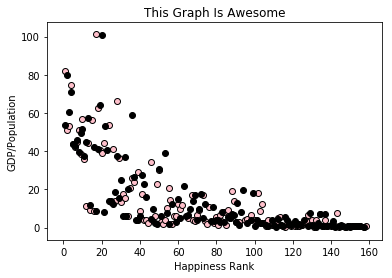

In [17]:
# print the bubble plot
fig, ax = plt.subplots()

ax.scatter(happiness['Happiness Rank 2015'], happiness['GDP/Pop 2015'], color='pink', edgecolor='k')
ax.plot([], [], 'o', color='pink')
ax.scatter(happiness['Happiness Rank 2016'], happiness['GDP/Pop 2016'], color='black', edgecolor='k')
ax.plot([], [], 'o', color='black')

plt.xlabel('Happiness Rank')
plt.ylabel('GDP/Population')
plt.title("This Graph Is Awesome")

#plt.legend( scatterpoints = 1, frameon=True,labelspacing=1, ncol = 1, title='City Type')

plt.show()

In [18]:
gdi_file = 'clean_GDI_data.csv'
gdi_df = pd.read_csv(gdi_file, sep=",", encoding='cp1252')
gdi_df.columns

Index(['Unnamed: 0', 'Country Name', '2015', '2016'], dtype='object')

In [19]:
happiness = pd.DataFrame.merge(happiness,gdi_df)
happiness.head()

,Country Name,Happiness Rank 2015,Hapiness Score 2015,Happiness Rank 2016,Happiness Score 2016,"GDP, 2015 (billions)","GDP, 2016 (billions)",Total Population 2015,Total Population 2016,GDP/Pop 2015,GDP/Pop 2016,Unnamed: 0,2015,2016
0,Switzerland,1,7.587,2,7.509,679.00,669.0,8282.40,8372.41,81.981068,79.905308,35,6.673750e+11,6.656087e+11
1,Iceland,2,7.561,3,7.501,16.94,20.3,330.82,335.44,51.206094,60.517529,112,1.891027e+12,2.063429e+12
2,Denmark,3,7.527,1,7.526,301.00,307.0,5683.48,5728.01,52.960510,53.596275,56,1.928783e+12,1.958050e+12
3,Norway,4,7.522,4,7.498,387.00,371.0,5190.24,5236.15,74.563026,70.853585,175,2.739875e+12,2.682282e+12
4,Canada,5,7.427,6,7.404,1560.00,1540.0,35832.51,36264.60,43.535884,42.465655,33,1.819117e+12,1.834327e+12


In [20]:
happiness = happiness.rename(columns={"2015":"GDI 2015", "2016":"GDI 2016"})
happiness.columns

Index(['Country Name', 'Happiness Rank 2015', 'Hapiness Score 2015',
       'Happiness Rank 2016', 'Happiness Score 2016', 'GDP, 2015 (billions)',
       'GDP, 2016 (billions)', 'Total Population 2015',
       'Total Population 2016', 'GDP/Pop 2015', 'GDP/Pop 2016', 'Unnamed: 0',
       'GDI 2015', 'GDI 2016'],
      dtype='object')

In [21]:
happiness['GDI/Pop 2015']=happiness['GDI 2015']/happiness['Total Population 2015']
happiness['GDI/Pop 2016']=happiness['GDI 2016']/happiness['Total Population 2016']
happiness.drop('Unnamed: 0',1)

,Country Name,Happiness Rank 2015,Hapiness Score 2015,Happiness Rank 2016,Happiness Score 2016,"GDP, 2015 (billions)","GDP, 2016 (billions)",Total Population 2015,Total Population 2016,GDP/Pop 2015,GDP/Pop 2016,GDI 2015,GDI 2016,GDI/Pop 2015,GDI/Pop 2016
0,Switzerland,1,7.587,2,7.509,679.00,669.00,8282.40,8372.41,81.981068,79.905308,6.673750e+11,6.656087e+11,8.057749e+07,7.950025e+07
1,Iceland,2,7.561,3,7.501,16.94,20.30,330.82,335.44,51.206094,60.517529,1.891027e+12,2.063429e+12,5.716182e+09,6.151410e+09
2,Denmark,3,7.527,1,7.526,301.00,307.00,5683.48,5728.01,52.960510,53.596275,1.928783e+12,1.958050e+12,3.393665e+08,3.418377e+08
3,Norway,4,7.522,4,7.498,387.00,371.00,5190.24,5236.15,74.563026,70.853585,2.739875e+12,2.682282e+12,5.278899e+08,5.122622e+08
4,Canada,5,7.427,6,7.404,1560.00,1540.00,35832.51,36264.60,43.535884,42.465655,1.819117e+12,1.834327e+12,5.076722e+07,5.058176e+07
5,Finland,6,7.406,5,7.413,232.00,239.00,5479.53,5495.30,42.339398,43.491711,1.888544e+11,1.940066e+11,3.446545e+07,3.530410e+07
6,Netherlands,7,7.378,7,7.339,758.00,777.00,16939.92,17030.31,44.746374,45.624536,6.556018e+11,6.735323e+11,3.870159e+07,3.954903e+07
7,Sweden,8,7.364,10,7.291,498.00,514.00,9799.19,9923.08,50.820527,51.798434,3.923267e+12,4.057650e+12,4.003664e+08,4.089104e+08
8,New Zealand,9,7.286,8,7.334,176.00,185.00,4595.70,4693.20,38.296669,39.418733,2.342325e+11,2.432843e+11,5.096774e+07,5.183762e+07
9,Australia,10,7.284,9,7.313,1350.00,1200.00,23850.78,24210.81,56.601922,49.564637,1.617016e+12,1.626981e+12,6.779720e+07,6.720058e+07


In [22]:
cpi_file = 'final_cpi_data.csv'
cpi_df = pd.read_csv(cpi_file)
cpi_df.columns

Index(['Unnamed: 0', 'Country Name', 'Indicator Name', 'Attribute', '2014',
       '2015', '2016'],
      dtype='object')

In [23]:
happiness = pd.DataFrame.merge(happiness,cpi_df, on="Country Name")
happiness

,Country Name,Happiness Rank 2015,Hapiness Score 2015,Happiness Rank 2016,Happiness Score 2016,"GDP, 2015 (billions)","GDP, 2016 (billions)",Total Population 2015,Total Population 2016,GDP/Pop 2015,...,GDI 2015,GDI 2016,GDI/Pop 2015,GDI/Pop 2016,Unnamed: 0_y,Indicator Name,Attribute,2014,2015,2016
0,Switzerland,1,7.587,2,7.509,679.00,669.00,8282.40,8372.41,81.981068,...,6.673750e+11,6.656087e+11,8.057749e+07,7.950025e+07,20930,"Consumer Price Index, All items",Value,101.781858,100.617575,100.180283
1,Iceland,2,7.561,3,7.501,16.94,20.30,330.82,335.44,51.206094,...,1.891027e+12,2.063429e+12,5.716182e+09,6.151410e+09,12111,"Consumer Price Index, All items",Value,235.960583,239.815158,243.876225
2,Denmark,3,7.527,1,7.526,301.00,307.00,5683.48,5728.01,52.960510,...,1.928783e+12,1.958050e+12,3.393665e+08,3.418377e+08,2161,"Consumer Price Index, All items",Value,99.550000,100.000000,100.250000
3,Norway,4,7.522,4,7.498,387.00,371.00,5190.24,5236.15,74.563026,...,2.739875e+12,2.682282e+12,5.278899e+08,5.122622e+08,10402,"Consumer Price Index, All items",Value,97.875000,100.000000,103.550000
4,Canada,5,7.427,6,7.404,1560.00,1540.00,35832.51,36264.60,43.535884,...,1.819117e+12,1.834327e+12,5.076722e+07,5.058176e+07,475,"Consumer Price Index, All items",Value,125.158333,126.566667,128.375000
5,Netherlands,7,7.378,7,7.339,758.00,777.00,16939.92,17030.31,44.746374,...,6.556018e+11,6.735323e+11,3.870159e+07,3.954903e+07,14283,"Consumer Price Index, All items",Value,99.403333,100.000000,100.316667
6,Sweden,8,7.364,10,7.291,498.00,514.00,9799.19,9923.08,50.820527,...,3.923267e+12,4.057650e+12,4.003664e+08,4.089104e+08,21486,"Consumer Price Index, All items",Value,313.492500,313.345833,316.430000
7,New Zealand,9,7.286,8,7.334,176.00,185.00,4595.70,4693.20,38.296669,...,2.342325e+11,2.432843e+11,5.096774e+07,5.183762e+07,12782,"Consumer Price Index, All items",Value,119.575000,119.925000,120.700000
8,Australia,10,7.284,9,7.313,1350.00,1200.00,23850.78,24210.81,56.601922,...,1.617016e+12,1.626981e+12,6.779720e+07,6.720058e+07,3561,"Consumer Price Index, All items",Value,106.075000,107.675000,109.050000
9,Israel,11,7.278,11,7.267,299.00,318.00,8380.10,8546.00,35.679765,...,1.071553e+12,1.128491e+12,1.278688e+08,1.320490e+08,12417,"Consumer Price Index, All items",Value,101.112233,100.505553,99.957861


In [24]:
happiness = happiness.drop('Unnamed: 0_y',1)
happiness = happiness.rename(columns={"2015": "CPI 2015", "2016": "CPI 2016"})
happiness.head()

,Country Name,Happiness Rank 2015,Hapiness Score 2015,Happiness Rank 2016,Happiness Score 2016,"GDP, 2015 (billions)","GDP, 2016 (billions)",Total Population 2015,Total Population 2016,GDP/Pop 2015,...,Unnamed: 0_x,GDI 2015,GDI 2016,GDI/Pop 2015,GDI/Pop 2016,Indicator Name,Attribute,2014,CPI 2015,CPI 2016
0,Switzerland,1,7.587,2,7.509,679.00,669.0,8282.40,8372.41,81.981068,...,35,6.673750e+11,6.656087e+11,8.057749e+07,7.950025e+07,"Consumer Price Index, All items",Value,101.781858,100.617575,100.180283
1,Iceland,2,7.561,3,7.501,16.94,20.3,330.82,335.44,51.206094,...,112,1.891027e+12,2.063429e+12,5.716182e+09,6.151410e+09,"Consumer Price Index, All items",Value,235.960583,239.815158,243.876225
2,Denmark,3,7.527,1,7.526,301.00,307.0,5683.48,5728.01,52.960510,...,56,1.928783e+12,1.958050e+12,3.393665e+08,3.418377e+08,"Consumer Price Index, All items",Value,99.550000,100.000000,100.250000
3,Norway,4,7.522,4,7.498,387.00,371.0,5190.24,5236.15,74.563026,...,175,2.739875e+12,2.682282e+12,5.278899e+08,5.122622e+08,"Consumer Price Index, All items",Value,97.875000,100.000000,103.550000
4,Canada,5,7.427,6,7.404,1560.00,1540.0,35832.51,36264.60,43.535884,...,33,1.819117e+12,1.834327e+12,5.076722e+07,5.058176e+07,"Consumer Price Index, All items",Value,125.158333,126.566667,128.375000


In [25]:
happiness = happiness.drop('Indicator Name',1)


In [26]:
happiness = happiness.drop('2014',1)

In [27]:
happiness = happiness.drop('Attribute', 1)

In [28]:
happiness = happiness.drop('Unnamed: 0_x',1)

In [29]:
happiness = happiness.rename(columns={"Happiness Rank_x":"Happiness Rank 2015", "Happiness Rank_y":"Happiness Rank 2016", "Happiness Score_x":"Happiness Score 2015", "Happiness Score_y":"Happiness Score 2016"})
happiness 

,Country Name,Happiness Rank 2015,Hapiness Score 2015,Happiness Rank 2016,Happiness Score 2016,"GDP, 2015 (billions)","GDP, 2016 (billions)",Total Population 2015,Total Population 2016,GDP/Pop 2015,GDP/Pop 2016,GDI 2015,GDI 2016,GDI/Pop 2015,GDI/Pop 2016,CPI 2015,CPI 2016
0,Switzerland,1,7.587,2,7.509,679.00,669.00,8282.40,8372.41,81.981068,79.905308,6.673750e+11,6.656087e+11,8.057749e+07,7.950025e+07,100.617575,100.180283
1,Iceland,2,7.561,3,7.501,16.94,20.30,330.82,335.44,51.206094,60.517529,1.891027e+12,2.063429e+12,5.716182e+09,6.151410e+09,239.815158,243.876225
2,Denmark,3,7.527,1,7.526,301.00,307.00,5683.48,5728.01,52.960510,53.596275,1.928783e+12,1.958050e+12,3.393665e+08,3.418377e+08,100.000000,100.250000
3,Norway,4,7.522,4,7.498,387.00,371.00,5190.24,5236.15,74.563026,70.853585,2.739875e+12,2.682282e+12,5.278899e+08,5.122622e+08,100.000000,103.550000
4,Canada,5,7.427,6,7.404,1560.00,1540.00,35832.51,36264.60,43.535884,42.465655,1.819117e+12,1.834327e+12,5.076722e+07,5.058176e+07,126.566667,128.375000
5,Netherlands,7,7.378,7,7.339,758.00,777.00,16939.92,17030.31,44.746374,45.624536,6.556018e+11,6.735323e+11,3.870159e+07,3.954903e+07,100.000000,100.316667
6,Sweden,8,7.364,10,7.291,498.00,514.00,9799.19,9923.08,50.820527,51.798434,3.923267e+12,4.057650e+12,4.003664e+08,4.089104e+08,313.345833,316.430000
7,New Zealand,9,7.286,8,7.334,176.00,185.00,4595.70,4693.20,38.296669,39.418733,2.342325e+11,2.432843e+11,5.096774e+07,5.183762e+07,119.925000,120.700000
8,Australia,10,7.284,9,7.313,1350.00,1200.00,23850.78,24210.81,56.601922,49.564637,1.617016e+12,1.626981e+12,6.779720e+07,6.720058e+07,107.675000,109.050000
9,Israel,11,7.278,11,7.267,299.00,318.00,8380.10,8546.00,35.679765,37.210391,1.071553e+12,1.128491e+12,1.278688e+08,1.320490e+08,100.505553,99.957861


In [30]:
happiness.head()

,Country Name,Happiness Rank 2015,Hapiness Score 2015,Happiness Rank 2016,Happiness Score 2016,"GDP, 2015 (billions)","GDP, 2016 (billions)",Total Population 2015,Total Population 2016,GDP/Pop 2015,GDP/Pop 2016,GDI 2015,GDI 2016,GDI/Pop 2015,GDI/Pop 2016,CPI 2015,CPI 2016
0,Switzerland,1,7.587,2,7.509,679.00,669.0,8282.40,8372.41,81.981068,79.905308,6.673750e+11,6.656087e+11,8.057749e+07,7.950025e+07,100.617575,100.180283
1,Iceland,2,7.561,3,7.501,16.94,20.3,330.82,335.44,51.206094,60.517529,1.891027e+12,2.063429e+12,5.716182e+09,6.151410e+09,239.815158,243.876225
2,Denmark,3,7.527,1,7.526,301.00,307.0,5683.48,5728.01,52.960510,53.596275,1.928783e+12,1.958050e+12,3.393665e+08,3.418377e+08,100.000000,100.250000
3,Norway,4,7.522,4,7.498,387.00,371.0,5190.24,5236.15,74.563026,70.853585,2.739875e+12,2.682282e+12,5.278899e+08,5.122622e+08,100.000000,103.550000
4,Canada,5,7.427,6,7.404,1560.00,1540.0,35832.51,36264.60,43.535884,42.465655,1.819117e+12,1.834327e+12,5.076722e+07,5.058176e+07,126.566667,128.375000


In [31]:
happiness.to_csv('happiness.csv')

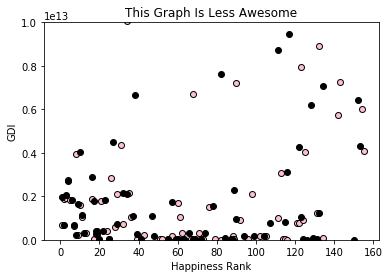

In [32]:
# print the bubble plot
fig, ax = plt.subplots()

ax.scatter(happiness['Happiness Rank 2015'], happiness['GDI 2015'], color='pink', edgecolor='k')
ax.plot([], [], 'o', color='pink')
ax.scatter(happiness['Happiness Rank 2016'], happiness['GDI 2016'], color='black', edgecolor='k')
ax.plot([], [], 'o', color='black')

plt.ylim(0,10000000000000)
plt.xlabel('Happiness Rank')
plt.ylabel('GDI')
plt.title("This Graph Is Less Awesome")

#plt.legend( scatterpoints = 1, frameon=True,labelspacing=1, ncol = 1, title='City Type')

plt.show()

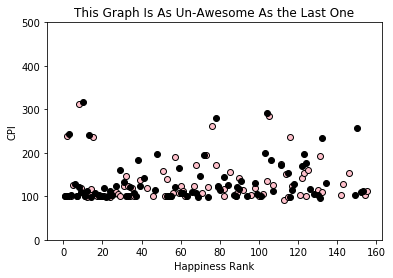

In [33]:
# print the bubble plot
fig, ax = plt.subplots()

ax.scatter(happiness['Happiness Rank 2015'], happiness['CPI 2015'], color='pink', edgecolor='k')
ax.plot([], [], 'o', color='pink')
ax.scatter(happiness['Happiness Rank 2016'], happiness['CPI 2016'], color='black', edgecolor='k')
ax.plot([], [], 'o', color='black')

plt.ylim(0,500)
plt.xlabel('Happiness Rank')
plt.ylabel('CPI')
plt.title("This Graph Is As Un-Awesome As the Last One")

plt.show()

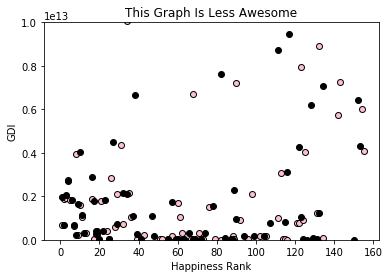

In [34]:
# print the bubble plot
fig, ax = plt.subplots()

ax.scatter(happiness['Happiness Rank 2015'], happiness['GDI 2015'], color='pink', edgecolor='k')
ax.plot([], [], 'o', color='pink')
ax.scatter(happiness['Happiness Rank 2016'], happiness['GDI 2016'], color='black', edgecolor='k')
ax.plot([], [], 'o', color='black')

plt.ylim(0,10000000000000)
plt.xlabel('Happiness Rank')
plt.ylabel('GDI')
plt.title("This Graph Is Less Awesome")

#plt.legend( scatterpoints = 1, frameon=True,labelspacing=1, ncol = 1, title='City Type')

plt.show()

In [36]:
print('happiness.csv')

happiness.csv
